# Train/Val/Test CLassifier

In [33]:
#We load the needed libraries
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import csv
from pandas.plotting import table
from dataset_statistics import *


In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

#### We split the data into 80% train, 10% test and 10% val.

In [24]:
#We load the data
df = pd.read_csv('../data/dataset_2_gaze_final.csv')
print(df.head())

                                           video_key  \
0  _REVIEWED/Testing_ProcessComplete/sourire_4me2...   
1  _REVIEWED/Testing_ProcessComplete/odaliscorder...   
2  annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4   
3     tami_mcin@hotmail.com/1587233613/GuessWhat.mp4   
4  _REVIEWED/Testing_ProcessComplete/knitsandgigg...   

                                   child_id  ASD   age  gender  VideoDuration  \
0           sourire_4me2@att.net__Gabriella    1  11.0  Female           89.1   
1            odaliscordero@gmail.com__Sarah    0   2.0  Female           88.6   
2       annaseemayer@yahoo.co.uk__Catherine    0   7.0  Female           94.6   
3             tami_mcin@hotmail.com__Adrian    1   7.0    Male          107.5   
4  knitsandgiggles5@gmail.com__Henrik Fotis    1   9.0    Male           88.6   

   VideoFrameRate  VideoFrameHeight  VideoFrameWidth  Confidence1  ...  \
0            24.0             360.0            480.0         99.8  ...   
1            25.0           

In [25]:
child_labels = df['child_id'].tolist()
users_index = [i for i in range(0,len(child_labels))]
child_labels

['sourire_4me2@att.net__Gabriella',
 'odaliscordero@gmail.com__Sarah',
 'annaseemayer@yahoo.co.uk__Catherine',
 'tami_mcin@hotmail.com__Adrian',
 'knitsandgiggles5@gmail.com__Henrik Fotis',
 'annaseemayer@yahoo.co.uk__Catherine',
 'katiarendongeorge@gmail.com__Natasha',
 'tami_mcin@hotmail.com__Adrian',
 'yukster_uk@yahoo.co.uk__Dylan',
 'pattyhiner@gmail.com__Charlotte',
 'yukster_uk@yahoo.co.uk__Dylan',
 'sreekantadu@gmail.com__Pronil',
 'anasli@gmail.com__Kendall',
 'BrodyLynne@gmail.com__Audrey',
 'cumlupo@gmail.com__Gaming',
 'billypano@hotmail.com__Alex',
 'katiarendongeorge@gmail.com__Natasha',
 'lynsohughes@gmail.com__Sidney ',
 'sabrinfatemaa@gmail.com__Apurbo',
 'mrspaine@yahoo.com__Eden',
 'giolitofam@yahoo.com__Rosana',
 'tami_mcin@hotmail.com__Adrian',
 'cumlupo@gmail.com__Gaming',
 'sabrinfatemaa@gmail.com__Apurbo',
 'anasli@gmail.com__Kendall',
 'carlanoblat@yahoo.com__Rebeca',
 'festogfarver@hotmail.com__Isabella',
 'harpertania@gmail.com__Serena',
 'jennifercstevenson@

In [26]:
X_train, X_test, y_train, y_test = train_test_split(users_index, child_labels, test_size=0.2, random_state=10)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=10)

#assert(len(set(X_train).intersection(set(X_val)))==0) #check for no overlap between train and test
assert(len(set(X_train).intersection(set(X_test)))==0)

In [27]:
#We define a dataframe for the train, validation and test sets using df.iloc
train_df = df.iloc[X_train]
val_df = df.iloc[X_val]
test_df = df.iloc[X_test]

train_df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
251,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.911923,26
131,tami_mcin@hotmail.com/1587237519/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,92.2,30.0,360.0,480.0,98.8,...,14.9,Male,90.5,0.044437,GuessWhat/tami_mcin@hotmail.com/1587237519/Ope...,GuessWhat/tami_mcin@hotmail.com/1587237519/jsons/,GuessWhat/tami_mcin@hotmail.com/1587237519/ima...,"[[-0.081307, -0.045672000000000004, -0.995642,...",0.932903,31
98,_REVIEWED/bangladesh_videos/%00_Good_GW_Gampla...,anowar6387@gmail.com__Arosh,0,4.0,Male,87.4,30.0,720.0,960.0,99.9,...,7.1,Male,91.5,0.272598,_REVIEWED/bangladesh_videos/%00_Good_GW_Gampla...,_REVIEWED/bangladesh_videos/%00_Good_GW_Gampla...,_REVIEWED/bangladesh_videos/%00_Good_GW_Gampla...,"[[0.09396399999999999, 0.004704, -0.9955639999...",0.971111,45
119,_REVIEWED/Testing_ProcessComplete/sarasatindav...,sarasatindavis@hotmail.com__Esther,0,4.0,Female,88.9,25.0,360.0,480.0,98.9,...,11.3,Female,99.6,0.068961,GuessWhat/_REVIEWED/Testing_ProcessComplete/sa...,GuessWhat/_REVIEWED/Testing_ProcessComplete/sa...,GuessWhat/_REVIEWED/Testing_ProcessComplete/sa...,"[[0.393827, -0.049257, -0.9178639999999999, 0....",0.957632,38
46,jenhicks@stanford.edu/1597285267/GuessWhat.mp4,jenhicks@stanford.edu__Juliet,0,5.0,Female,94.5,25.0,360.0,480.0,98.3,...,39.0,Male,97.0,0.030311,GuessWhat/jenhicks@stanford.edu/1597285267/Ope...,GuessWhat/jenhicks@stanford.edu/1597285267/jsons/,GuessWhat/jenhicks@stanford.edu/1597285267/ima...,"[[0.082705, -0.208828, -0.974449, -0.110775, -...",0.913030,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,juliannjenne@gmail.com/1608648895/GuessWhat.mp4,juliannjenne@gmail.com__Rachel,0,6.0,Female,97.7,25.0,360.0,480.0,99.1,...,21.6,Female,96.8,0.023797,GuessWhat/juliannjenne@gmail.com/1608648895/Op...,GuessWhat/juliannjenne@gmail.com/1608648895/js...,GuessWhat/juliannjenne@gmail.com/1608648895/im...,"[[0.296075, -0.023311000000000002, -0.95488, 0...",0.910909,44
15,billypano@hotmail.com/1622504001/GuessWhat.mp4,billypano@hotmail.com__Alex,0,6.0,Female,98.7,30.0,360.0,480.0,99.7,...,19.3,Female,99.4,0.089664,GuessWhat/billypano@hotmail.com/1622504001/Ope...,GuessWhat/billypano@hotmail.com/1622504001/jsons/,GuessWhat/billypano@hotmail.com/1622504001/ima...,"[[0.013986000000000002, 0.130853, -0.991303, -...",0.941915,47
228,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,100.0,...,8.0,Female,99.3,0.201487,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.11249200000000001, -0.061897, -0.99172299...",0.941167,60
125,katiarendongeorge%40gmail.com/1628703168423/Gu...,katiarendongeorge@gmail.com__Natasha,0,4.0,Female,57.7,29.9,768.0,1024.0,99.8,...,12.3,Female,98.9,0.042941,katiarendongeorge%40gmail.com/1628703168423/Op...,katiarendongeorge%40gmail.com/1628703168423/js...,katiarendongeorge%40gmail.com/1628703168423/im...,"[[0.10082999999999999, 0.072436, -0.9922629999...",0.975000,20


In [28]:
train_stats = asd_children_statistics(train_df)
val_stats = asd_children_statistics(val_df)
test_stats = asd_children_statistics(test_df)

print("Train : ")
print(train_stats)
print("\n")
print("Val : ")
print(val_stats)
print("\n")
print("Test : ")
print(test_stats)

Train : 
{'Number of children with ASD': 46, 'Number of videos with ASD': 100, 'Number of children without ASD': 45, 'Number of videos without ASD': 104, 'Ratio of children with ASD/children without ASD': 1.0222222222222221}


Val : 
{'Number of children with ASD': 18, 'Number of videos with ASD': 24, 'Number of children without ASD': 14, 'Number of videos without ASD': 17, 'Ratio of children with ASD/children without ASD': 1.2857142857142858}


Test : 
{'Number of children with ASD': 19, 'Number of videos with ASD': 26, 'Number of children without ASD': 15, 'Number of videos without ASD': 26, 'Ratio of children with ASD/children without ASD': 1.2666666666666666}


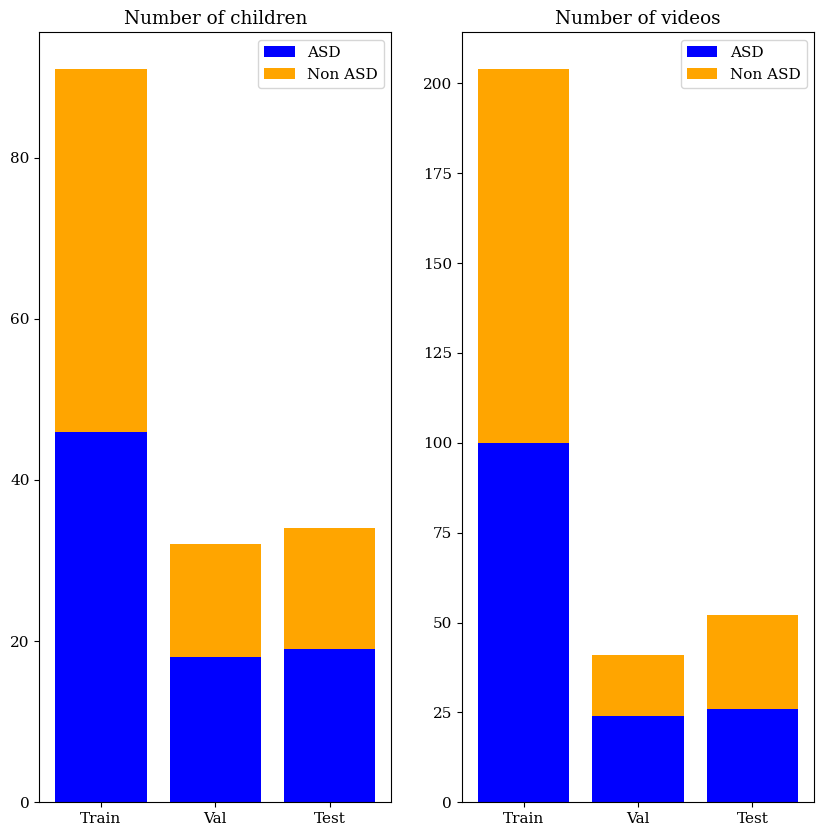

In [30]:
get_graph_asd_children(train_df, val_df, test_df)

In [32]:
#We save the training, validation and test sets in csv files
train_df.to_csv('./splits/train.csv', index=False)
#val_df.to_csv('./splits/val.csv', index=False)
test_df.to_csv('./splits/test.csv', index=False)

## 